## 線形回帰（Numpy）

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression

In [3]:
n_samples = 100  # サンプル数
var = .2

In [4]:
def linear_func(x: np.ndarray) -> np.ndarray:
    """ 2x + 5 の結果を返す """
    y = 2 * x + 5
    return y

In [5]:
def add_noise(y_true: np.ndarray, var: float) -> np.ndarray:
    """ 正規分布に従うノイズを追加する """
    noise = np.random.normal(scale=var, size=y_true.shape)  # scale : 標準偏差
    y_noise = y_true + noise
    return y_noise

In [6]:
xs = np.linspace(0, 1, n_samples)
ys_true = linear_func(xs)  # 実際のy (直線)
ys = add_noise(ys_true, var)  # 実際のyにランダムなノイズを追加する

In [7]:
print(xs.shape)
print(ys.shape)
print(ys_true[:5])
print(ys[:5])

(100,)
(100,)
[5.         5.02020202 5.04040404 5.06060606 5.08080808]
[4.73006578 4.98704612 4.989618   5.10580005 5.4399841 ]


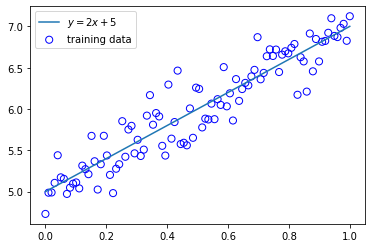

In [8]:
# 結果をプロットする
# ノイズを追加したデータは散布図で描画
plt.scatter(xs, ys, facecolor="none", edgecolor="b", s=50,  label="training data")
# 実際の結果は直線で描画
plt.plot(xs, ys_true, label="$y = 2x + 5$")
plt.legend()
plt.show()

### 学習

目的： y = ax + b の a, b を求める。<br/>
具体的には <br/>
(1) $\hat{a} = \text{Cov}[x, y] / \text{Var}[x]$ <br/> 
(2) $\hat{b} = \mu_{y} - \hat{a} \mu_{x}$ で求める。<br/>
$\mu$ は、平均を意味する。

In [9]:
def train(xs: np.ndarray, ys: np.ndarray):
    """ 回帰の実装 """
    cov = np.cov(xs, ys, ddof=0)  # ddof=0なら、平均を返す。
    cov_xy = cov[0, 1]
    var_x = cov[0, 0]  # 共分散行列の(0, 0)は、xの分散
    
    a = cov_xy / var_x  # (1) aを求める
    b = np.mean(ys) - a * np.mean(xs)  # (2) bを求める
    return cov, a, b

cov, a, b = train(xs, ys)
print(f'共分散:\n{cov}')
print(f'係数a: {a}')
print(f'切片b: {b}')

共分散:
[[0.08501684 0.17104936]
 [0.17104936 0.39199707]]
係数a: 2.0119468796729976
切片b: 4.98616846134564


In [10]:
# 比較として、 scikit-learnの出力を表示する
model_lr = LinearRegression()
# sklearnのfit使用時は、ndarrayを reshape(-1, 1) する (n行1列にする)
history_lr = model_lr.fit(xs.reshape(-1, 1), ys.reshape(-1, 1))

print(f'係数a: {history_lr.coef_}')
print(f'切片b: {history_lr.intercept_}')

係数a: [[2.01194688]]
切片b: [4.98616846]


### 予測
上で学習した a, b から y_pred = ax + b の直線を描画し、元の y_true と比較する。

In [11]:
ys_pred = a * xs + b

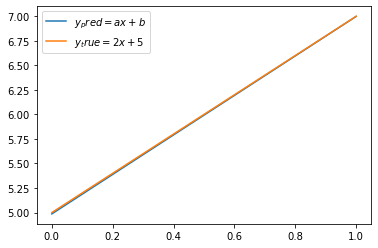

In [12]:
# 比較結果をプロットする
# 実際の結果は直線で描画
plt.plot(xs, ys_pred, label="$y_pred = ax + b$")
plt.plot(xs, ys_true, label="$y_true = 2x + 5$")
plt.legend()
plt.show()

## 重回帰分析
### 訓練データ生成（三次元入力）

In [13]:
np.random.random((10, 3))  # 10行3列で0以上1未満の乱数を作成

array([[0.59000817, 0.1998186 , 0.52352722],
       [0.77803138, 0.05401851, 0.01784514],
       [0.23481004, 0.81065679, 0.94383889],
       [0.20005752, 0.78324177, 0.25225318],
       [0.88088106, 0.93605775, 0.55904713],
       [0.85551574, 0.06028156, 0.08170994],
       [0.23591797, 0.50150365, 0.05597029],
       [0.81355506, 0.49094392, 0.13500277],
       [0.10121958, 0.88621191, 0.24700779],
       [0.53981133, 0.15783825, 0.06582376]])

In [14]:
n_sample = 100
var = .2
x_dim = 3

In [15]:
def mul_linear_func(x: np.ndarray) -> np.ndarray:
    """ y = 1.0 + 0.5*X_0 + 2*X_0 + X_0 """
    ww = [1., 0.5, 2., 1.]
    return ww[0] + ww[1] * x[:, 0] + ww[2] * x[:, 1] + ww[3] * x[:, 2]

In [16]:
def add_noise(y_true: np.ndarray, var: float) -> np.ndarray:
    return y_true + np.random.normal(scale=var, size=y_true.shape)

In [17]:
X = np.random.random((n_sample, x_dim))
ys_true = mul_linear_func(X)
ys = add_noise(ys_true, var)

In [18]:
print(X.shape)
print(ys.shape)

(100, 3)
(100,)


In [19]:
X[:3]

array([[0.66384635, 0.65607973, 0.03516313],
       [0.5891829 , 0.4542343 , 0.24933357],
       [0.17297704, 0.72040168, 0.62098903]])

### 学習
求める回帰係数 $w$ は以下のように書ける。 <br/>
$\hat{w} = \left( X^{\mathrm{T}} X \right)^{-1}  X^{\mathrm{T}} y$

In [20]:
def add_one(X: np.ndarray) -> np.ndarray:
    """ 行列Xの1列目に全て1の列を追加する """
    ones = np.ones(len(X))[:, None]
    added_X = np.concatenate([ones, X], axis=1)
    return added_X

In [21]:
X_train = add_one(X)  # Xに1の列を追加する

In [22]:
X_train[:3]  # 1の列が追加されていることを確認

array([[1.        , 0.66384635, 0.65607973, 0.03516313],
       [1.        , 0.5891829 , 0.4542343 , 0.24933357],
       [1.        , 0.17297704, 0.72040168, 0.62098903]])

In [23]:
# 公式にならって w を求める
tmp = np.dot(X_train.T, X_train)
tmp = np.linalg.inv(tmp)
tmp = np.dot(tmp, X_train.T)
w = np.dot(tmp, ys)

In [24]:
print(w)

[0.95416114 0.57758213 1.97948036 0.93512432]


### 予測
入力に対する値を $y(x) = \hat{w}^{\mathrm{T}}  x \ (y = X\hat{w})$ で予測する

In [25]:
w_true = [1., 0.5, 2., 1.]  # 正解のwの値

In [26]:
for i in range(len(w)):
    print("w{0}_true: {1:>5.2}   w{0}_estimated: {2:>5.2}".format(i, w_true[i], w[i]))

w0_true:   1.0   w0_estimated:  0.95
w1_true:   0.5   w1_estimated:  0.58
w2_true:   2.0   w2_estimated:   2.0
w3_true:   1.0   w3_estimated:  0.94
